## DATA HACKERMAN FINAL PROJECT

### Part 4 _Model Creation_

This final task involves creating a predictive model for a response variable, given a set of features. The task is to create a predictive model for the variable ‘properties.sentiment’ using the remaining features in the data set.

- Use AutoGluon or your preferred algorithm.
- The data files attached should be used to create the model.  

This task is a blank canvas to work with. The only caveat is that you must be able to explain the methods and models you are using.

- What we would like to see from this task is your thoughts and decisions on training and testing a model. This will include, but not limited to, considering aspects such as 
    - feature selection & creation
    - parameter tuning of the model
    - train / validation / test split. 



In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
pd.options.display.max_colwidth = None
pd.set_option("display.float_format", lambda x: '%.2f' % x)

from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
from data_ingestion.ingest import get_data
from parameters.params import combined_data_file_path

In [3]:
data = get_data(combined_data_file_path)
data.head(2)

,author.properties.friends,author.properties.status_count,author.properties.verified,content.body,location.country,properties.platform,properties.sentiment,location.latitude,location.longitude
0,1689,22566.00,False,Can't believe I'm missing Love Island 😩,GB,twitter,1.00,51.57,0.46
1,114,1377.00,False,Last tweet about future wedding..... if I actually want a wedding I actually need to find a guy XD we all know I'm a loner. unlovable,GB,twitter,1.00,52.97,-1.17


In [4]:
data.rename(columns = {'author.properties.friends': 'friends',
                        'author.properties.status_count': 'status_count',
                        'author.properties.verified': 'verified', 
                        'content.body': 'text', 
                        'location.country': 'country',
                        'properties.platform': 'platform', 
                        'properties.sentiment': 'sentiment', 
                        'location.latitude': 'latitude',
                        'location.longitude': 'longitude'},
                        inplace=True)

In [5]:
data.columns

Index(['friends', 'status_count', 'verified', 'text', 'country', 'platform',
       'sentiment', 'latitude', 'longitude'],
      dtype='object')

In [6]:
df = data[['text', 'sentiment']]
df.head()

,text,sentiment
0,Can't believe I'm missing Love Island 😩,1.00
1,Last tweet about future wedding..... if I actually want a wedding I actually need to find a guy XD we all know I'm a loner. unlovable,1.00
2,"How many times does he wonna say the phrase ""i deal with shit"" #LoveIsland",-1.00
3,...even better if time travel were invented and I could go there back in 1876 and have a whiskey with Al #Deadwood,-1.00
4,@GreenAlty @ShakeyStephens My Mum in mid 80s pushed into road by Black migrants 2 sons with disabilities attacked robbed U THINK WE NEED MOR,0.00


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   text       2999 non-null   object 
 1   sentiment  2999 non-null   float64
dtypes: float64(1), object(1)
memory usage: 47.0+ KB


In [8]:
miss = df[df.isnull().any(axis=1)]
miss

,text,sentiment
1552,NaN,NaN


In [9]:
df = df.dropna(axis=0)

In [10]:
df.shape

(2999, 2)

In [11]:
len(df['text'].isnull())

2999

In [17]:
df.shape

(2999, 2)

In [18]:
df["sentiment"] = df["sentiment"].astype('int64')

In [19]:
train_data, test_data = train_test_split(
    df, test_size=0.1, random_state=42
)

In [20]:
from autogluon.text import TextPredictor

predictor = TextPredictor(label='sentiment', eval_metric='acc', path='artefacts/model')
predictor.fit(train_data, time_limit=60)

NOTE: Redirects are currently not supported in Windows or MacOs.
Global seed set to 123
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name              | Type                         | Params
-------------------------------------------------------------------
0 | model             | HFAutoModelForTextPrediction | 108 M 
1 | validation_metric | Accuracy                     | 0     
2 | loss_func         | CrossEntropyLoss             | 0     
-------------------------------------------------------------------
108 M     Trainable params
0         Non-trainable params
108 M     Total params
435.576   Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

NOTE: Redirects are currently not supported in Windows or MacOs.
NOTE: Redirects are currently not supported in Windows or MacOs.


Training: 0it [00:00, ?it/s]

NOTE: Redirects are currently not supported in Windows or MacOs.
NOTE: Redirects are currently not supported in Windows or MacOs.
Time limit reached. Elapsed time is 0:01:00. Signaling Trainer to stop.


Validation: 0it [00:00, ?it/s]

NOTE: Redirects are currently not supported in Windows or MacOs.
NOTE: Redirects are currently not supported in Windows or MacOs.
Epoch 0, global step 2: 'val_acc' reached 0.24600 (best 0.24600), saving model to '/Users/damilolaadesina/Documents/data_hackerman/workspace_datahackerman/datahackerman_project/artefacts/model/epoch=0-step=2.ckpt' as top 3


Predicting: 0it [00:00, ?it/s]

NOTE: Redirects are currently not supported in Windows or MacOs.
NOTE: Redirects are currently not supported in Windows or MacOs.


In [21]:
test_score = predictor.evaluate(test_data)
print(test_score)

Predicting: 0it [00:00, ?it/s]

NOTE: Redirects are currently not supported in Windows or MacOs.
NOTE: Redirects are currently not supported in Windows or MacOs.


{'acc': 0.25666666666666665}


In [22]:
print('Accuracy = {:.2f}%'.format(test_score['acc'] * 100))

Accuracy = 25.67%


In [23]:
sentence1 = "it's a charming and often affecting journey."
sentence2 = "It's slow, very, very, very slow."
predictions = predictor.predict({'text': [sentence1, sentence2]})
print('"Sentence":', sentence1, '"Predicted Sentiment":', predictions[0])
print('"Sentence":', sentence2, '"Predicted Sentiment":', predictions[1])

"Sentence": it's a charming and often affecting journey. "Predicted Sentiment": 1
"Sentence": It's slow, very, very, very slow. "Predicted Sentiment": 1


In [24]:
probs = predictor.predict_proba({'text': [sentence1, sentence2]})
print('"Sentence":', sentence1, '"Predicted Class-Probabilities":', probs[0])
print('"Sentence":', sentence2, '"Predicted Class-Probabilities":', probs[1])

"Sentence": it's a charming and often affecting journey. "Predicted Class-Probabilities": 0   0.38
1   0.23
Name: 0, dtype: float32
"Sentence": It's slow, very, very, very slow. "Predicted Class-Probabilities": 0   0.47
1   0.68
Name: 1, dtype: float32


In [25]:
test_predictions = predictor.predict(test_data)
test_predictions.head()

Predicting: 0it [00:00, ?it/s]

NOTE: Redirects are currently not supported in Windows or MacOs.
NOTE: Redirects are currently not supported in Windows or MacOs.


1376    0
932     1
144     1
1753    1
51      0
Name: sentiment, dtype: int64

In [26]:
loaded_predictor = TextPredictor.load('artefacts/model')
loaded_predictor.predict_proba({'text': [sentence1, sentence2]})

,-1,0,1
0,0.15,0.38,0.47
1,0.09,0.23,0.68


In [27]:
loaded_predictor.save('my_saved_dir')
loaded_predictor2 = TextPredictor.load('my_saved_dir')
loaded_predictor2.predict_proba({'text': [sentence1, sentence2]})

,-1,0,1
0,0.15,0.38,0.47
1,0.09,0.23,0.68


## Extract Embeddings

In [28]:
embeddings = predictor.extract_embedding(test_data)
print(embeddings)

Predicting: 0it [00:00, ?it/s]

NOTE: Redirects are currently not supported in Windows or MacOs.
NOTE: Redirects are currently not supported in Windows or MacOs.


[[ 0.16767508  0.22883233  0.1828631  ...  0.6689207  -0.09905552
   0.40423933]
 [-0.06713669  0.22097638 -0.07217658 ... -0.1499725  -0.16141936
   0.34083325]
 [ 0.02561498  0.86543256  0.1617303  ... -0.35027927 -0.28268436
   0.20654565]
 ...
 [ 0.04702848  0.6235811   0.3399149  ...  0.35647237 -0.4222696
   0.2861198 ]
 [ 0.22970963  0.21140854  0.4041306  ...  0.37296388 -0.5188095
   0.4696733 ]
 [-0.19601384  0.04779636  0.28410795 ...  0.32373175 -0.2547451
   0.24738061]]


Here, we use TSNE to visualize these extracted embeddings. We can see that there are two clusters corresponding to our two labels, since this network has been trained to discriminate between these labels.

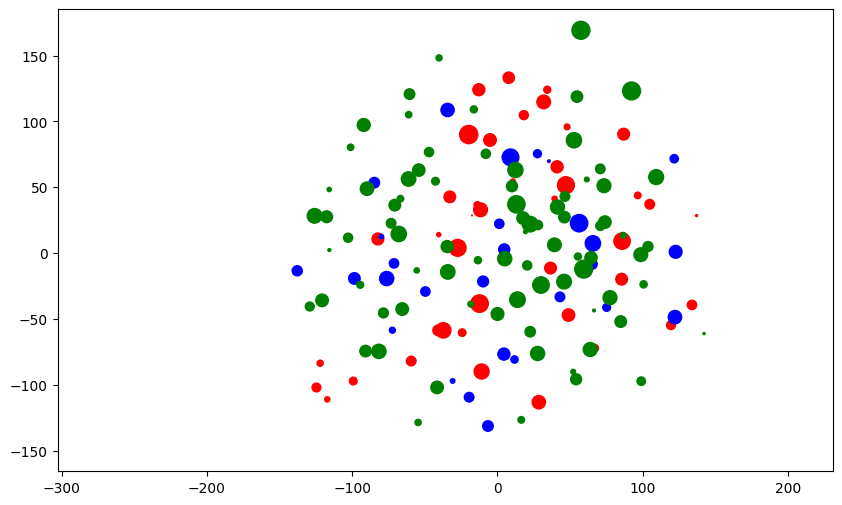

In [29]:
plt.figure(figsize=(10,6))
X_embedded = TSNE(n_components=3, random_state=123).fit_transform(embeddings)
for val, color in [(0, 'red'), (1, 'blue'), (-1, 'green')]:
    idx = (test_data['sentiment'].to_numpy() == val).nonzero()
    plt.scatter(X_embedded[idx, 0], X_embedded[idx, 1], X_embedded[idx, -1], c=color, label=f'sentiment={val}')
#plt.legend(loc='best')